In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('fake-news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
#get independent features by dropping the last column
X= df.drop('label', axis = 1)

In [6]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
#get dependent feature
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
#CountVectorizer is also called bag of words

In [11]:
#drop null values
df = df.dropna()

In [12]:
messages = df.copy()

In [13]:
messages.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
messages.reset_index(inplace=True) #after dropping the null values, some indices may be lost, so we want the indexes to be in order

In [15]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import re

# Define the path to the directory containing the files
directory_path = '/Users/palakprashant/Fake_News_Classifier/Fake_News_Classifier/stopwords/english'

# Initialize an empty list to store the words
words_list = []

# Open and read the file
with open(directory_path, 'r', encoding='utf-8') as file:
    file_contents = file.read()
    
    # Extract words using regular expressions
    words = file_contents.split()
    
    # Append the words to the list
    words_list.extend(words)

# Print the list of words
print(words_list)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i]) #in all rows of the text feature, replace all characters EXCEPT a-z and A-Z by a blank space
    review = review.lower() #make all the text in lowercase
    review = review.split() #we are using a split because after this we will apply the stop keywords and the stemming
    review = [ps.stem(word) for word in review if not word in words_list] #only include words that are not stop words
    corpus.append(' '.join(review)) # Join the words back into a single string



In [24]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [25]:
#Apply Count Vectorizer/Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3)) #take the most frequent 5000 words and take their combinations as well (for 1-3 words as a feature) and then apply bag of words
X = cv.fit_transform(corpus).toarray()

In [26]:
X.shape

(18285, 5000)

In [27]:
y = messages['label'] #output feature

In [28]:
#Divide data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
cv.get_feature_names_out()[:20] #these are our feature names

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [32]:
#we get info about the algorithm we have defined regarding count vectorizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names_out()) #get whether or not (1 or 0) the feature name is present in a sentence of the corpus

In [37]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl (63 kB)
Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-p

In [39]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Multinomial Naive Bayes Algorithm ##

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [41]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:  0.9017499088589136
Confusion matrix, without normalization


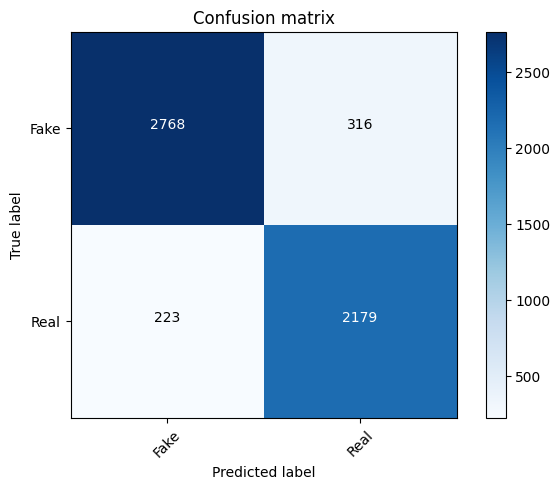

In [43]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy: ", score)
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])
#False positives and negatives are very less

## Passive Aggressive Classifier Algorithm ##

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier #works very well on text data
linear_classifier = PassiveAggressiveClassifier(max_iter = 50)

accuracy:  0.915785636164783
Confusion matrix, without normalization


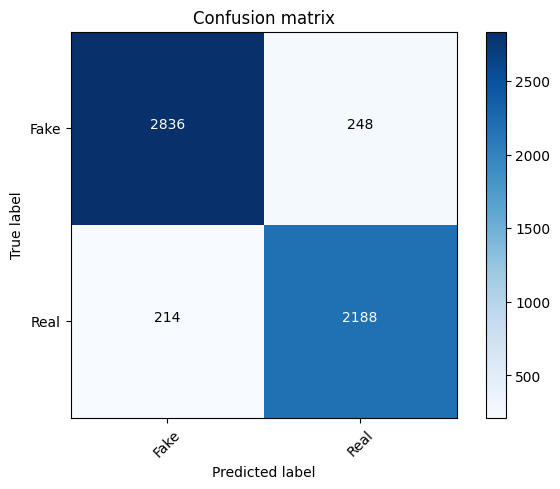

In [47]:
linear_classifier.fit(X_train, y_train)
prediction_pac = linear_classifier.predict(X_test)
score_pac = metrics.accuracy_score(y_test, prediction_pac)
print("accuracy: ", score_pac)
cm_pac = metrics.confusion_matrix(y_test, prediction_pac)
plot_confusion_matrix(cm_pac, classes = ['Fake', 'Real'])
#False positives and negatives are very less. works slightly better than multinomial naive bayes model

## Multinomial Classifier with Hyperparameter Tuning ##

In [59]:
classifier = MultinomialNB(alpha = 0.1)

In [58]:
previous_score = 0
for alpha in np.arange(0, 1, 0.1): #getting alpha from 0 to 1 in steps of 0.1
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier =  sub_classifier # replace the classifier with the sub classifier
    print("Alpha: {}, Score: {}". format(alpha, score))

/Users/palakprashant/Fake_News_Classifier/Fake_News_Classifier/.venv/lib/python3.13/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Alpha: 0.0, Score: 0.5621582209259934
Alpha: 0.1, Score: 0.9030258840685381
Alpha: 0.2, Score: 0.9030258840685381
Alpha: 0.30000000000000004, Score: 0.9026613197229311
Alpha: 0.4, Score: 0.9019321910317171
Alpha: 0.5, Score: 0.9024790375501276
Alpha: 0.6000000000000001, Score: 0.9028436018957346
Alpha: 0.7000000000000001, Score: 0.9035727305869486
Alpha: 0.8, Score: 0.9030258840685381
Alpha: 0.9, Score: 0.9032081662413416


In [54]:
#Get feature names
features = cv.get_feature_names_out()

Getting the most real and fake words using the Passive Aggressive Classifier:

In [60]:
linear_classifier.coef_[0] #the most negative value is the fakest value, the least negative value is the most real word

array([-0.92007451, -1.54368311, -0.53335584, ..., -0.98850765,
        0.1850665 ,  0.10613647])

In [66]:
## Most real words:
sorted(zip(linear_classifier.coef_[0], features), reverse = True)[:100]

[(np.float64(3.095406573173184), 'hillari'),
 (np.float64(2.9465015183269094), 'idiot'),
 (np.float64(2.79029163222439), 'migrant crisi'),
 (np.float64(2.7100357396448422), 'journal'),
 (np.float64(2.6765605638063263), 'trump need'),
 (np.float64(2.602595921703943), 'ap'),
 (np.float64(2.5854041894316757), 'report new york'),
 (np.float64(2.5497330312445388), 'american peopl'),
 (np.float64(2.535878224419636), 'evid'),
 (np.float64(2.472534814684366), 'report new'),
 (np.float64(2.432670941616783), 'reason'),
 (np.float64(2.4163514275728715), 'daesh'),
 (np.float64(2.3764855731334884), 'comment'),
 (np.float64(2.305906610469623), 'quak'),
 (np.float64(2.305240731046329), 'illeg alien muslim'),
 (np.float64(2.2119716740477324), 'elderli'),
 (np.float64(2.191569976787672), 'ridicul'),
 (np.float64(2.1562637593723837), 'humili'),
 (np.float64(2.1348451939172715), 'next'),
 (np.float64(2.1278751250990386), 'invis'),
 (np.float64(2.1256592807288586), 'meddl'),
 (np.float64(2.122381967553642

In [67]:
#Most fake words
sorted(zip(linear_classifier.coef_[0], features))[:100]

[(np.float64(-6.683589522286081), 'breitbart'),
 (np.float64(-3.7845240458793583), 'hillari clinton'),
 (np.float64(-3.7581718411196263), 'streisand'),
 (np.float64(-3.673694399411607), 'delingpol'),
 (np.float64(-3.4065598153396106), 'snl'),
 (np.float64(-3.281302464546146), 'new year'),
 (np.float64(-3.080803571490644), 'london'),
 (np.float64(-3.014685850659321), 'cher'),
 (np.float64(-2.9578251162128444), 'clinton aid'),
 (np.float64(-2.9012678902315288), 'netanyahu'),
 (np.float64(-2.871715366768654), 'kati'),
 (np.float64(-2.8199321557668733), 'trump order'),
 (np.float64(-2.7773535226019694), 'twin'),
 (np.float64(-2.7494780084295347), 'ck'),
 (np.float64(-2.7442295362802285), 'espn'),
 (np.float64(-2.7279858168014983), 'cent'),
 (np.float64(-2.7127362953725096), 'virgil'),
 (np.float64(-2.6863489017803217), 'attack syria'),
 (np.float64(-2.6809400924631235), 'new york time'),
 (np.float64(-2.6809400924631235), 'york time'),
 (np.float64(-2.674366629539385), 'fake news'),
 (np.f